<h1> Overlapping Clusters - improving the network </h1>
Date: 25th March 2023

What if I sort the cluster not by the highest energy but by the highest $x$ value? Or $y$ value?

In [1]:
# own skrips
import helperfile as hf
import myfunctions_1photon as mf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
import myfunctions_1photon as mf

<h2> Sort by x!

In [2]:
rootfile = uproot.open('./stage4_clusters.root')
ipd = hf.InputData_2photon(rootfile, sort_cond='x')
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  154.68830060958862 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [3]:
model_x = keras.Sequential([layers.Input(shape=(81)),
                         layers.Normalization(mean=2.5, variance=13.4),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(512, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(6, activation=None)])
model_x.summary()
model_x.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 81)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               10496     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8

In [4]:
a = time.time()
fit_hist_x = model_x.fit(ipd.clusters_t, ipd.training, batch_size=64, epochs=100, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/100
7405/7405 [==============================] - 11s 1ms/step - loss: 407.6461 - val_loss: 332.0829
Epoch 2/100
7405/7405 [==============================] - 10s 1ms/step - loss: 309.2138 - val_loss: 297.5076
Epoch 3/100
7405/7405 [==============================] - 11s 1ms/step - loss: 285.7167 - val_loss: 279.8304
Epoch 4/100
7405/7405 [==============================] - 11s 1ms/step - loss: 270.9370 - val_loss: 278.8960
Epoch 5/100
7405/7405 [==============================] - 11s 1ms/step - loss: 261.8500 - val_loss: 270.6605
Epoch 6/100
7405/7405 [==============================] - 11s 1ms/step - loss: 254.0399 - val_loss: 258.1513
Epoch 7/100
7405/7405 [==============================] - 11s 1ms/step - loss: 248.7057 - val_loss: 255.4043
Epoch 8/100
7405/7405 [==============================] - 11s 2ms/step - loss: 243.5261 - val_loss: 249.3566
Epoch 9/100
7405/7405 [==============================] - 11s 2ms/step - loss: 238.6731 - val_loss: 245.7617
Epoch 10/100
7405/7405 [====

7405/7405 [==============================] - 11s 2ms/step - loss: 166.3584 - val_loss: 201.2210
Epoch 77/100
7405/7405 [==============================] - 11s 2ms/step - loss: 164.8437 - val_loss: 198.7060
Epoch 78/100
7405/7405 [==============================] - 11s 2ms/step - loss: 165.7770 - val_loss: 192.5128
Epoch 79/100
7405/7405 [==============================] - 11s 2ms/step - loss: 164.6058 - val_loss: 192.0811
Epoch 80/100
7405/7405 [==============================] - 11s 2ms/step - loss: 163.9320 - val_loss: 193.4305
Epoch 81/100
7405/7405 [==============================] - 11s 2ms/step - loss: 163.6636 - val_loss: 189.5925
Epoch 82/100
7405/7405 [==============================] - 11s 2ms/step - loss: 163.4906 - val_loss: 193.3104
Epoch 83/100
7405/7405 [==============================] - 11s 2ms/step - loss: 162.6832 - val_loss: 190.0351
Epoch 84/100
7405/7405 [==============================] - 11s 2ms/step - loss: 162.6721 - val_loss: 191.6329
Epoch 85/100
7405/7405 [========

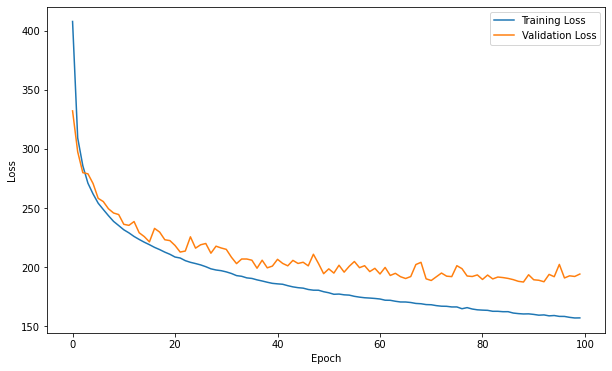

In [11]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist_x, log=False)

In [6]:
output_x = model_x.predict(ipd.clusters_v)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

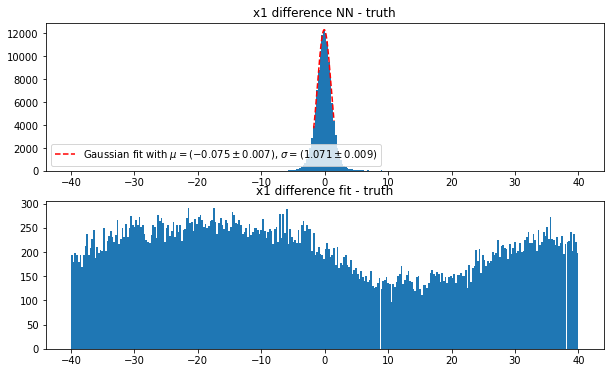

In [22]:
mf.histo_output(output_x.T[0], ipd.veri_fit.T[0], ipd.veri_truth.T[0], name="x1", range_x=(-40,40))

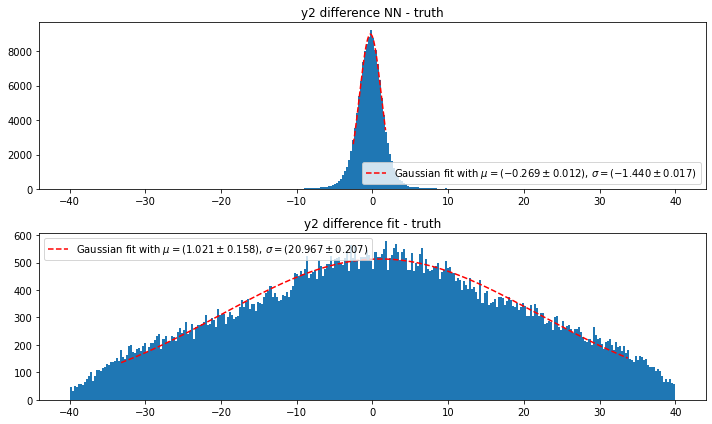

(array([-2.69112718e-01, -1.43984625e+00,  3.24313393e+04]),
 array([1.24501048e-02, 1.68206538e-02, 3.03463260e+02]),
 array([1.02108614e+00, 2.09665790e+01, 2.69747046e+04]),
 array([1.58262783e-01, 2.07007151e-01, 2.15068233e+02]))

In [7]:
mf.histo_output(output_x.T[4], ipd.veri_fit.T[4], ipd.veri_truth.T[4], name="y2", range_x=(-40,40))

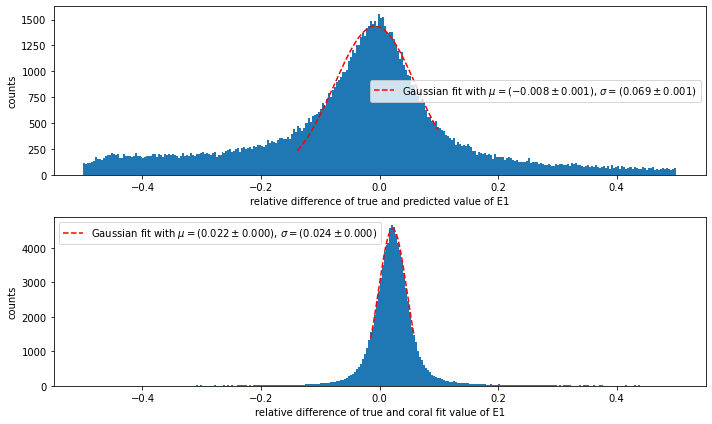

In [8]:
E_bad = mf.histo_output_relE(output_x.T[2], ipd.veri_fit.T[2], ipd.veri_truth.T[2], name="E1", range_x=(-0.5,0.5), fit=True)

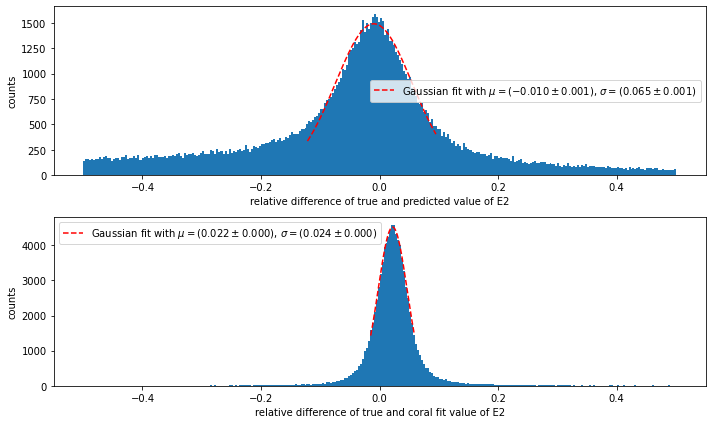

In [9]:
E_bad = mf.histo_output_relE(output_x.T[5], ipd.veri_fit.T[5], ipd.veri_truth.T[5], name="E2", range_x=(-0.5,0.5), fit=True)

In [12]:
model_x.save('stage4_network_sort_x')

INFO:tensorflow:Assets written to: stage4_network_sort_x/assets


<h2> Sort by y!

In [13]:
rootfile1 = uproot.open('./stage4_clusters.root')
ipd1 = hf.InputData_2photon(rootfile1, sort_cond='y')
ipd1.form_cluster()
ipd1.train_test_split()
ipd1.prep_trainingsdata()
ipd1.prep_verificationdata()

Initialized object
Start shaping clusters in a  (9, 9)  grid...
Shaping the clusters took  152.5367841720581 s
Splitted data into training and test set!
Prepared 'veri_truth' data
Prepared 'veri_fit' data (Lednev fit from coral)


In [14]:
model_y = keras.Sequential([layers.Input(shape=(81)),
                         layers.Normalization(mean=2.5, variance=13.4),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(512, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(6, activation=None)])
model_y.summary()
model_y.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 81)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               10496     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [15]:
a = time.time()
fit_hist_y = model_y.fit(ipd1.clusters_t, ipd1.training, batch_size=64, epochs=100, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/100
7405/7405 [==============================] - 11s 1ms/step - loss: 412.5174 - val_loss: 326.3633
Epoch 2/100
7405/7405 [==============================] - 10s 1ms/step - loss: 313.8229 - val_loss: 298.0009
Epoch 3/100
7405/7405 [==============================] - 10s 1ms/step - loss: 288.8337 - val_loss: 280.3474
Epoch 4/100
7405/7405 [==============================] - 11s 1ms/step - loss: 273.4148 - val_loss: 277.3238
Epoch 5/100
7405/7405 [==============================] - 11s 1ms/step - loss: 264.3828 - val_loss: 268.3761
Epoch 6/100
7405/7405 [==============================] - 11s 1ms/step - loss: 256.5560 - val_loss: 255.1632
Epoch 7/100
7405/7405 [==============================] - 11s 1ms/step - loss: 251.3525 - val_loss: 255.5564
Epoch 8/100
7405/7405 [==============================] - 11s 1ms/step - loss: 246.0808 - val_loss: 239.9421
Epoch 9/100
7405/7405 [==============================] - 11s 1ms/step - loss: 240.8129 - val_loss: 238.0354
Epoch 10/100
7405/7405 [====

7405/7405 [==============================] - 11s 1ms/step - loss: 165.7810 - val_loss: 194.3435
Epoch 77/100
7405/7405 [==============================] - 11s 1ms/step - loss: 165.5529 - val_loss: 192.5551
Epoch 78/100
7405/7405 [==============================] - 11s 1ms/step - loss: 165.2250 - val_loss: 196.7923
Epoch 79/100
7405/7405 [==============================] - 11s 1ms/step - loss: 165.3053 - val_loss: 191.1375
Epoch 80/100
7405/7405 [==============================] - 11s 1ms/step - loss: 165.1305 - val_loss: 198.3777
Epoch 81/100
7405/7405 [==============================] - 11s 1ms/step - loss: 164.3036 - val_loss: 189.1279
Epoch 82/100
7405/7405 [==============================] - 11s 2ms/step - loss: 164.1552 - val_loss: 190.5895
Epoch 83/100
7405/7405 [==============================] - 11s 2ms/step - loss: 163.3306 - val_loss: 195.5614
Epoch 84/100
7405/7405 [==============================] - 11s 2ms/step - loss: 163.0544 - val_loss: 195.6294
Epoch 85/100
7405/7405 [========

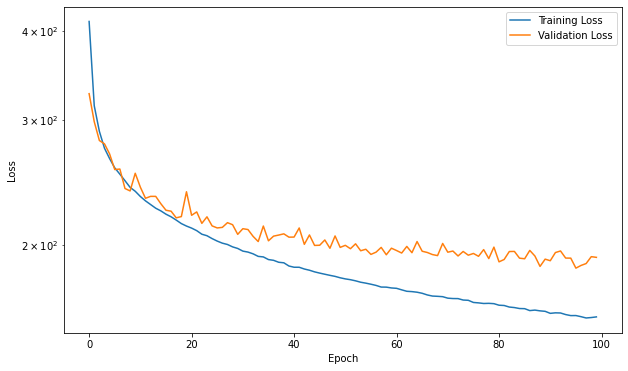

In [16]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist_y)

In [17]:
output_y = model_y.predict(ipd1.clusters_v)

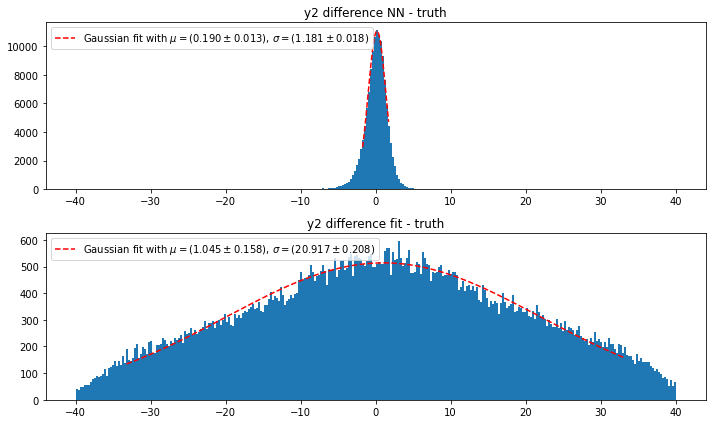

(array([1.90057664e-01, 1.18111270e+00, 3.27194849e+04]),
 array([1.31288646e-02, 1.77019597e-02, 3.93272544e+02]),
 array([1.04473560e+00, 2.09168359e+01, 2.69405481e+04]),
 array([1.58420504e-01, 2.07783934e-01, 2.16030404e+02]))

In [18]:
mf.histo_output(output_y.T[4], ipd1.veri_fit.T[4], ipd1.veri_truth.T[4], name="y2", range_x=(-40,40))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

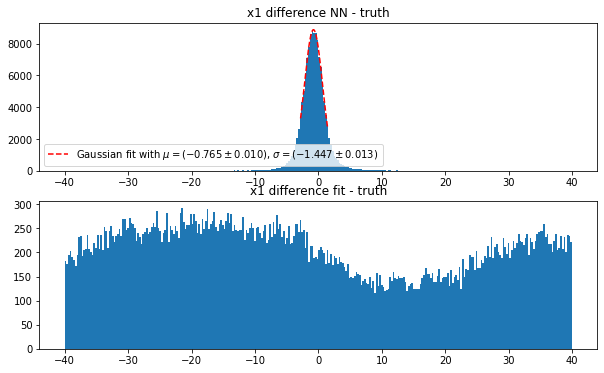

In [24]:
mf.histo_output(output_y.T[0], ipd1.veri_fit.T[0], ipd1.veri_truth.T[0], name="x1", range_x=(-40,40))

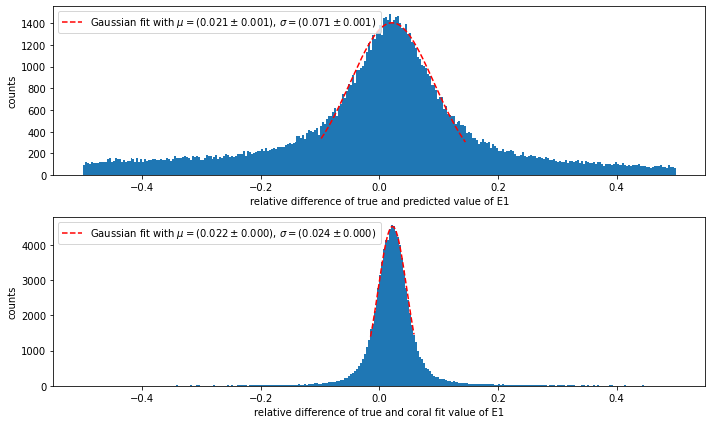

In [19]:
E_bad = mf.histo_output_relE(output_y.T[2], ipd1.veri_fit.T[2], ipd1.veri_truth.T[2], name="E1", range_x=(-0.5,0.5), fit=True)

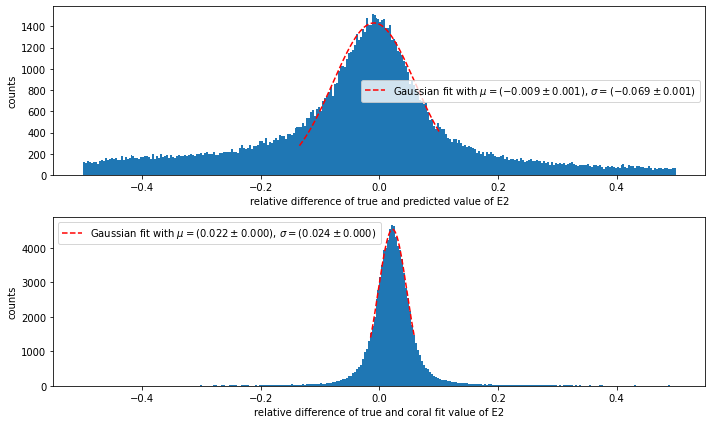

In [20]:
E_bad = mf.histo_output_relE(output_y.T[5], ipd1.veri_fit.T[5], ipd1.veri_truth.T[5], name="E2", range_x=(-0.5,0.5), fit=True)

In [21]:
model_y.save('stage4_network_sort_y')

INFO:tensorflow:Assets written to: stage4_network_sort_y/assets


<h2> summary... </h2>

| (rel E1, rel E1, x1, y2) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| x_sort | 0.008 / 0.010 / 0.075 / 0.269 | 0.069 / 0.065 / 1.071 / 1.440|
| y_sort | 0.021 / 0.009 / 0.765 / 0.190| 0.071 / 0.069 / 1.447 / 1.181|